

# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We, **Team 9**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.



### Predict Overview: EDSA Movie Recommendation 2022

The global movie industry is a multi-billion dollar industry. According to <a href="https://www.forbes.com/sites/bradadgate/2022/03/17/overview-of-the-entertainment-market-in-2021-coming-out-of-covid-19/?sh=2e3d5f94519c">Forbes</a>, a total revenue of 36.8 billion USD was made in the US entertainment (home and mobile) market in 2021. This market consist of digital and physical (discs), as well as the theatrical market, and the revenue accounted for a year-over-year increase of 14%, a figure that surpassed the record 36.1 billion USD in 2019.

When pay TV subscriptions were included the revenue for the entertainment market jumped to $133.5 billion, and this represents a slight drop-off from revenue in 2020 (133.7 billion USD). This is a clear indication that pay TV subscritions are the biggest revenue generating facet of the movie industry.

Globally, in 2021, the home, mobile and theatrical market totaled $99.7 billion in revenue, while when pay TV subscription was included, the entertainment market reached 328.2 billion USD in revenue. According to the 2021 report by The Motion Picture Association in the US, there were 135 streaming video providers in the U.S. offering movies and television shows to viewers, with Netlix being a major player.

Providers of streaming services heavily depend on movie recommendation algorithms. The Netflix Recommendation Engine is the most succesful of these algorithms. It’s so accurate that 80% of Netflix viewer activity is driven by personalised recommendations from the engine. It’s estimated that the Netflix recommendation Engine saves Netflix <a href="https://www.lighthouselabs.ca/en/blog/how-netflix-uses-data-to-optimize-their-product#:~:text=The%20Netflix%20Recommendation%20Engine&text=It's%20so%20accurate%20that%2080,is%20driven%20by%20personalised%20recommendations.">over $1 billion per year</a>.

Providers of streaming services are in a race to optimize the performance of their movie recommendation algorithm such the it performs as good or even better than the Netflix Recommendation Engine; therefore, develeping a good movie recommendation system come with enormous economic gains.  As a team, we intend to develope a recommendation algorithm based on content or collaborative filtering, that is capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences. The will enable our algorithm to recommend movies that users will most likly rate high and want to watch.

##   Data Overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. 

 <a id="one"></a>
# **1. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, we import and briefly discuss the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# machine learning - experiment tracking
!pip install comet-ml
from comet_ml import Experiment

# imports and dataframes and collections
import numpy as np
import pandas as pd
from numpy import percentile
from itertools import product
from collections import defaultdict, Counter
from scipy import sparse
from tqdm import tqdm

!pip install --upgrade --no-cache-dir gdown
import gdown
from collections import Counter

# text manipulation
import string
import re
import copy
from ast import literal_eval

# modelling
from scipy.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pickle

# performance metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# clear warnings
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 347 kB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 551 kB 2.9 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=ec9829a96cfd6d72f2837460ac71fc13307a878938869181080cf1cfd341626f
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [4]:
import io
from google.colab import files, drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Loading the Data**
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we load the data from the `CSV files` file into a DataFrame. |

---

In [5]:
# Upload train.csv
train_df = pd.read_csv('/content/drive/My Drive/Recommender/train.csv')

In [6]:
# Upload movies.csv
!gdown --id 1eCZYlL2_x6wgNHiHDBc28T-d9zdv3bOD 

# create the dataframe
movies_df = pd.read_csv('/content/movies.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eCZYlL2_x6wgNHiHDBc28T-d9zdv3bOD
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 71.8MB/s]


In [7]:
# Upload test.csv
test_df = pd.read_csv('/content/drive/My Drive/Recommender/test.csv')

In [8]:
# Upload imdb_data.csv
imdb_df = pd.read_csv('/content/drive/My Drive/Recommender/imdb_data.csv')

#### Data Description
* movies.csv - Movie title and genre data.
* imdb_data.csv - Additional movie metadata scraped from IMDB 
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

#### Deep copies
Next we will create deep copies of each dataframe in order to retain the original data in the case of an accidental change being made.

In [9]:
# create deep copy of the imdb dataframe
imdb_dfC = pd.DataFrame(columns = imdb_df.columns, data = copy.deepcopy(imdb_df.values))

In [158]:
# create deep copy of the movies dataframe
movies_dfC = pd.DataFrame(columns = movies_df.columns, data = copy.deepcopy(movies_df.values))

In [11]:
# create deep copy of the test dataframe
test_dfC = pd.DataFrame(columns = test_df.columns, data = copy.deepcopy(test_df.values))

In [12]:
# create deep copy of the train dataframe
train_dfC = pd.DataFrame(columns = train_df.columns, data = copy.deepcopy(train_df.values))

# **3. Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the variables in the DataFrame. |

### Helper functions
Next we'll create a helper function that will help us extract meaningful information from the datasets.

In [13]:
# function to get the null values
def get_info(df):
    """This function returns the shape, column names, 
    data tpes and null value count for a dataframe"""
    # extract the df name
    name = [x for x in globals() if globals()[x] is df][0]
    
    # print the shape (rows and columns) of the dataset
    print(name,'has',df.shape[0], 
          'rows and', df.shape[1], 'columns, namely:\n', 
          list(df.columns), end='\n\n')

    # print the data types of each row
    print('The following table represents the column data types in',name, end=':\n\n')
    print(df.info(), end='\n\n')
    
    # get the total number of null values per column
    missing = pd.DataFrame(df.isnull().sum(), columns=['null_values'])

    # calculate the percentage of missing values
    missing['null_values_%'] = round((df.isnull().sum() / len(df)) * 100)
    print('The following table represents the missing values and the corresponding % in',
          name, end=':\n\n')
    print(missing, end='\n\n')
    
    # print the first 5 rows of the table
    print('The following is a printout of the first 5 rows in',
          name, end=':\n\n')
    print(df.head())

### Exploring the imdb dataset

In [10]:
get_info(imdb_dfC)

imdb_dfC has 27278 rows and 6 columns, namely:
 ['movieId', 'title_cast', 'director', 'runtime', 'budget', 'plot_keywords']

The following table represents the column data types in imdb_dfC:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movieId        27278 non-null  object
 1   title_cast     17210 non-null  object
 2   director       17404 non-null  object
 3   runtime        15189 non-null  object
 4   budget         7906 non-null   object
 5   plot_keywords  16200 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB
None

The following table represents the missing values and the corresponding % in imdb_dfC:

               null_values  null_values_%
movieId                  0            0.0
title_cast           10068           37.0
director              9874           36.0
runtime              12089           44.0
budget      

In [ ]:
print('There are',imdb_dfC['director'].nunique(),'different directors')

There are 11786 different directors


#### **Comments**

* The budget feature is of type object, however 71% of the budget column values are null. We will convert every number field in budget to a float, but it it fails, it will be converted to NaN. We will also verify whether this column as well as the runtime column contributes meaningfully to the algorithm given the high number of null values. If so, the null values will be filled.
* There are 10,068 records without cast members. We will have to deal with these

### Exploring the movies dataset

In [14]:
get_info(movies_dfC)

movies_dfC has 62423 rows and 3 columns, namely:
 ['movieId', 'title', 'genres']

The following table represents the column data types in movies_dfC:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  object
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB
None

The following table represents the missing values and the corresponding % in movies_dfC:

         null_values  null_values_%
movieId            0            0.0
title              0            0.0
genres             0            0.0

The following is a printout of the first 5 rows in movies_dfC:

  movieId                               title  \
0       1                    Toy Story (1995)   
1       2                      Jumanji (1995)   
2       3             Grumpier Old Men (1995)   
3       4      

#### Comment
* The movies dataset contains 62,423 rows and 3 columns. There are no null values. 
* The `movieId`, `title` and `genres` columns are of type object
* The `title` feature has the title of the move as well as the year of production. We will separate the year into its own column.

Next we will graphically depict the use of genres within the movies dataset.

In [160]:
# create a list of all genre elements
all_genres_elements = movies_dfC.genres.to_list()

In [161]:
# fill a list off each individual genre element
single_genre = []
for e in all_genres_elements:
  e = e.split('|')
  for i in e:
    single_genre.append(i)

# use the list to get a count of the use of the different genre items
genre_counts_dict = dict()
for i in single_genre:
  genre_counts_dict[i] = genre_counts_dict.get(i, 0) + 1
genre_counts_dict

# turn genre counts dictionary into a dataframe
genre_counts_df = pd.DataFrame(
    {'genre': genre_counts_dict.keys(), "count": genre_counts_dict.values()}
)

# display the dataframe
genre_counts_df.sort_values('count', ascending=False).head()

,genre,count
6,Drama,25606
3,Comedy,16870
9,Thriller,8654
5,Romance,7719
7,Action,7348


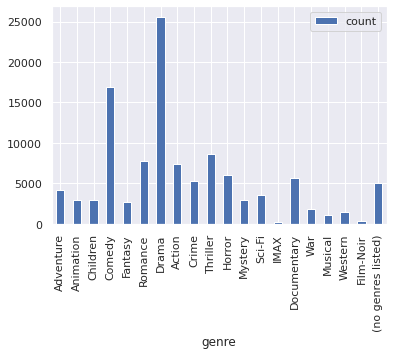

In [38]:
# Plot the the genre usage on a histogram plot
genre_counts_df.plot(x ='genre', y='count', kind = 'bar')

In [41]:
# get the (no genres listed) count
genre_counts_df[genre_counts_df['genre'] == '(no genres listed)']

,genre,count
19,(no genres listed),5062


#### Comment
From the data and graph above we note that the top 5 genres are: 
1. Drama (used in 25,606 movies)
2. Comedy (used in 16870 movies)
3. Thriller (used in 8654 movies)
4. Romance (used in 7719 movies) 
5. Action (used in 7348 movies)

Furthermore there are 5062 movies with no genres listed. This identifier must be removed to avoid it being used as feature during modelling. 

Next we will explore the year of production by extracting it from the movie title.

In [159]:
# function to extract year from title
def extract_year(col):
    """This function extracts the year from the title column"""
    # finds all the paranthesis with four digits in them
    nums = re.findall(r"\(\d{4}\)", col)
    if len(nums) == 0:
        return np.nan
    elif len(nums) == 1:
        return nums[0]
    else:
        return nums[-1]

# extract the year from the title and remove the parentheses
movies_dfC['year'] = movies_dfC['title'].apply(extract_year).replace(r"[()]", '', regex=True)

# print the first five rows
movies_dfC

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


In [169]:
# count the unique years
print(movies_dfC.year.nunique(), end='\n\n')
print(movies_dfC['year'].value_counts().head(3))

135

2015    2513
2016    2488
2014    2406
Name: year, dtype: int64


Text(0.5, 1.0, 'Total movies released per year')

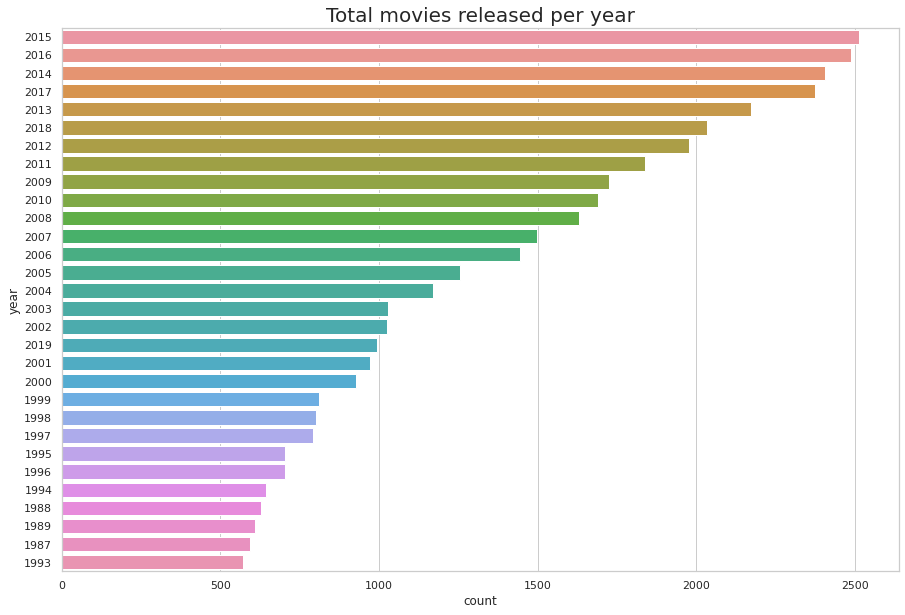

In [166]:
# Plot movies per year released
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
order = movies_dfC['year'].value_counts().index[0:30]

ax = sns.countplot(y=movies_dfC['year'], data=movies_dfC, order=order)
ax.set_title('Total movies released per year', fontsize= 20)

There are 135 years of production. The most releases happened in:
* 2015 (2513 releases) 
* 2016 (2488 releases)
* 2014 (2406 releases) 

### Exploring the train dataset

In [ ]:
get_info(train_dfC)

train_dfC has 10000038 rows and 4 columns, namely:
 ['userId', 'movieId', 'rating', 'timestamp']

The following table represents the column data types in train_dfC:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     float64       
 1   movieId    float64       
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 305.2 MB
None

The following table represents the missing values and the corresponding % in train_dfC:

           null_values  null_values_%
userId               0            0.0
movieId              0            0.0
rating               0            0.0
timestamp            0            0.0

The following is a printout of the first 5 rows in train_dfC:

     userId  movieId  rating           timestamp
0    5163.0  57669.0     4.0 2018-02-11 11:53:12
1  106343.0      5.0     4

#### Comment
* There are no null values in the train dataset
* `userID` and `movieId` are of type float. It makes more sense for it to be type object as it's an identifier not a number. This will be converted.
* `timestamp` is of type float. This will be converted to type datetime

Next we will get more information on the ratings given.

In [ ]:
# describe the rating column in a readable format
train_df['rating'].describe().apply("{0:.2f}".format)


count    10000038.00
mean            3.53
std             1.06
min             0.50
25%             3.00
50%             3.50
75%             4.00
max             5.00
Name: rating, dtype: object

#### Comment
* There are 10,000,038 ratings 
* The lowest and highest ratings are 0.5 and 5 while the average rating is 3.5.
* 50% of the movies were rated 3.5 or below
* 25% of the movies were rated 4 or above

Next we will explore the popularity of movies and investigate the ratings provided.

In [11]:
# Calculate the number of unique ratings
print('There are', train_dfC['rating'].nunique(),
      'ratings:', train_dfC['rating'].unique())

There are 10 ratings: [4.  4.5 5.  2.  3.  1.  3.5 2.5 0.5 1.5]


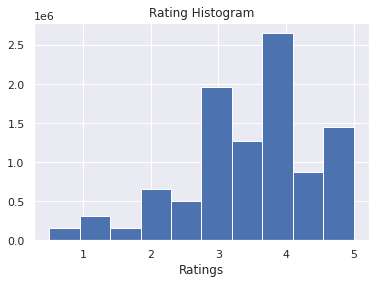

In [12]:
# Plot the the ratings on a histogram plot
train_df['rating'].hist()
plt.title('Rating Histogram')
plt.xlabel('Ratings')
plt.show()

From the histogram above, we see that the 4, followd by 3 and 5 are the three most frequently provided ratings. Let's get a sense of the distribution of votes (as in count of votes) for movies.

In [175]:
# create a dictionary with movieIds and the count of votes
movie_to_votes_counter = Counter(train_dfC['movieId'].to_list())

In [176]:
# create a dataframe of the movie_to_votes_dict
movie_to_votes_df = pd.DataFrame.from_dict(movie_to_votes_counter, orient='index').reset_index()
movie_to_votes_df = movie_to_votes_df.rename(columns={'index':'movieId', 0:'count'})
movie_to_votes_df.head()

,movieId,count
0,57669.0,4253
1,5.0,4648
2,5459.0,5730
3,32296.0,658
4,366.0,1077


In [15]:
movie_to_votes_df['count'].describe().T

count    48213.000000
mean       207.413727
std       1092.768777
min          1.000000
25%          1.000000
50%          4.000000
75%         26.000000
max      32831.000000
Name: count, dtype: float64

Based on prior tests, we found that the system is able to handle pivoting data to approximately 800k records. Therefor we will create upper and lower limits (based on votes) for the data to get to these records.

In [182]:
record_table = []
def record_split(movie_to_votes_df, lower, upper):
  """This function counts and prints the number of records that account 
  for movies within the upper and lower limits"""
  q = (movie_to_votes_df['count'] >= lower) & (movie_to_votes_df['count'] <= upper)
  r = (movie_to_votes_df[q]['count'].sum())
  print('Movies between', lower, 'and', upper,':',r,'records',end='\n\n')
  record_table.append((lower, upper, r))
  return record_table

In order to provide more accurate predictions, taking into consideration the system limitations, the dataset will be split into 13 pivot tables.

In [183]:
print('1: ',end='')
record_split(movie_to_votes_df, 0, 250)
print('2: ',end='')
record_split(movie_to_votes_df, 251, 600)
print('3: ',end='')
record_split(movie_to_votes_df, 601, 1100)
print('4: ',end='')
record_split(movie_to_votes_df, 1101, 1800)
print('5: ',end='')
record_split(movie_to_votes_df, 1801, 2600)
print('6: ',end='')
record_split(movie_to_votes_df, 2601, 3500)
print('7: ',end='')
record_split(movie_to_votes_df, 3501, 4500)
print('8: ',end='')
record_split(movie_to_votes_df, 4501, 5900)
print('9: ',end='')
record_split(movie_to_votes_df, 5901, 8000)
print('10: ',end='')
record_split(movie_to_votes_df, 8001, 11000)
print('11: ',end='')
record_split(movie_to_votes_df, 11001, 15000)
print('12: ',end='')
record_split(movie_to_votes_df, 15001, 27000)
print('13: ',end='')
record_split(movie_to_votes_df, 27001, 2000000)


1: Movies between 0 and 250 : 815433 records

2: Movies between 251 and 600 : 738449 records

3: Movies between 601 and 1100 : 809884 records

4: Movies between 1101 and 1800 : 869182 records

5: Movies between 1801 and 2600 : 812564 records

6: Movies between 2601 and 3500 : 799543 records

7: Movies between 3501 and 4500 : 797895 records

8: Movies between 4501 and 5900 : 869486 records

9: Movies between 5901 and 8000 : 861683 records

10: Movies between 8001 and 11000 : 835353 records

11: Movies between 11001 and 15000 : 817665 records

12: Movies between 15001 and 27000 : 789972 records

13: Movies between 27001 and 2000000 : 182929 records



[(0, 250, 815433),
 (251, 600, 738449),
 (601, 1100, 809884),
 (1101, 1800, 869182),
 (1801, 2600, 812564),
 (2601, 3500, 799543),
 (3501, 4500, 797895),
 (4501, 5900, 869486),
 (5901, 8000, 861683),
 (8001, 11000, 835353),
 (11001, 15000, 817665),
 (15001, 27000, 789972),
 (27001, 2000000, 182929)]

Next we will create a dataframe from the record table for easier referencing.

In [18]:
record_df = pd.DataFrame(record_table, columns =['lower', 'upper', 'record_count'])

### Exploring the test dataset

In [ ]:
get_info(test_dfC)

test_dfC has 5000019 rows and 2 columns, namely:
 ['userId', 'movieId']

The following table represents the column data types in test_dfC:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB
None

The following table represents the missing values and the corresponding % in test_dfC:

         null_values  null_values_%
userId             0            0.0
movieId            0            0.0

The following is a printout of the first 5 rows in test_dfC:

   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318


In [ ]:
# print number of movies being rated
print('There are',test_dfC.movieId.nunique(),'movies being rated by', test_dfC.userId.nunique(), 'uers.')

There are 39643 movies being rated by 162350 uers.


#### Comment
* There are no null values in the test dataset
* `userID` and `movieId` are of type int. It makes more sense for it to be type object as it's an identifier not a number. This will be converted.
* `timestamp` is of type float. This will be converted to type datetime

#**4. Data Engineering**
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, we clean the dataset and possibly create new features - as identified in the EDA phase. |

---

Next we'll create a helper functions that will help us perform feature engineering on the datasets.
### Helper functions

In [20]:
# Function to convert a feature to a float
def to_float(col):
    """This function converts features to type float"""
    try:
      col = float(col)
    except:
      col = np.nan
    return col

# Function to convert a feature to a int
def to_int(col):
    """This function converts features to type float"""
    try:
      col = int(col)
    except:
      col = np.nan
    return col

# Function convert null to empties and replaces pipes
def separate_pipes(df, col):
    """ This function converts all null into empty strings
    and replaces pipes with commas"""
    # convert all nulls into empty lists
    df[col] = df[col].fillna('')
    # replace pipes with commas and convert to list of strings
    df[col] = df[col].replace(r"\|", ', ', regex=True)
    return df

# Function converts cells to list
def create_lists(df, col):
    """ This function converts all null into empty lists
    and replaces pipes with commas"""
    # convert all nulls into empty lists
    df[col] = df[col].fillna('[]')
    # replace pipes with commas and convert to list of strings
    df[col] = df[col].apply(lambda x: list(x.split(",")))
    return df

### Engineering movies dataset

#### Cleaning the data
Next we will clean the movies dataset by:
* removing the pipes
* removing (no genres listed)

In [21]:
# replace the pipes in the `genres` feature of movies
movies_dfC = separate_pipes(movies_dfC, 'genres')


In [22]:
# extract the different genres used
genre_set = set()
for i in list(movies_dfC['genres'].unique()):
  for j in i.split(','):
    genre_set.add(j.strip())

print('These are', len(genre_set),'elements listed in the genres feature:', end='\n\n')
genre_set

These are 20 elements listed in the genres feature:



{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [23]:
# replace '(no genres listed)' with ''
movies_dfC['genres'] = movies_dfC['genres'].replace(r'\b(no genres listed)\b','', regex=True)
movies_dfC['genres'] = movies_dfC['genres'].replace('[()]','', regex=True)

In [24]:
# print the first 5 rows of the dataset
movies_dfC.tail()

,movieId,title,genres,year
62418,209157,We (2018),Drama,2018.0
62419,209159,Window of the Soul (2001),Documentary,2001.0
62420,209163,Bad Poems (2018),"Comedy, Drama",2018.0
62421,209169,A Girl Thing (2001),,2001.0
62422,209171,Women of Devil's Island (1962),"Action, Adventure, Drama",1962.0


### Engineering the imdb dataset

#### Cleaning the data
Next we will clean the imdb dataset by:
* removing the pipes
* removing '$' from the budget and converting it to a float
* converting runtime to a float

In [25]:
# replace the pipes in the title_cast,plot_keywords features of train_movies_imdb_combined
f_list = ['title_cast','plot_keywords']
for f in f_list:
  imdb_dfC = separate_pipes(imdb_dfC, f)

# convert the `budget` type from object to float
imdb_dfC['budget'] = imdb_dfC['budget'].replace('[\$,]','', regex=True).apply(to_float)

# convert the `runtime` type from object to float
imdb_dfC['runtime'] = imdb_dfC['runtime'].apply(to_float)

# print the first row of the dataset
imdb_dfC.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter,81.0,30000000.0,"toy, rivalry, cowboy, cgi animation"
1,2,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Jonathan Hensleigh,104.0,65000000.0,"board game, adventurer, fight, game"
2,3,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Mark Steven Johnson,101.0,25000000.0,"boat, lake, neighbor, rivalry"
3,4,"Whitney Houston, Angela Bassett, Loretta Devin...",Terry McMillan,124.0,16000000.0,"black american, husband wife relationship, bet..."
4,5,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Albert Hackett,106.0,30000000.0,"fatherhood, doberman, dog, mansion"


#### Filling missing values
Earlier at the EDA stage, we discovered that the columns, `runtime` and `budget` are missing some of their values. This will adversly affect the algorithm as no model can be trained on blank data points. We will therefore, later either delete (should the number of observations be minimal) or fill in our missing values, being numerical, with the median value. This will be ideal because the Median, as a measure of central tendency, is robust to outliers. These will be dealt with once the tables are merged to avoid duplication of filling.

### Engineering the train dataset

#### Cleaning the data
Next we will convert the `timestamp` feature from a Unix based timecode to an appropriate datetime format readable to humans.

In [26]:
# extract the UNIX based timestamp from the timestamp feature
train_dfC['timestamp'] = pd.to_datetime(train_dfC['timestamp'], unit='s')

### Combining dataframes
Next we will combine imdb_dfC, movies_dfC and train_dfC dataframes: 
* user ratings are provided in the `train` dataset while movie data, such as the `title` is in the `movies` dataset and `runtime` in the `imdb` dataset. The runtime will be useful in creating a top performing movie list.

In [27]:
# combine train_df and movies_df
train_movies_combined_df = pd.merge(left=train_dfC, right=movies_dfC, 
                                    how='left', on='movieId')


In [28]:
# combine train_movies_combined_df and imdb_dfC
train_movies_imdb_combined_df = pd.merge(left=train_movies_combined_df,
                                         right=imdb_dfC, how='left', on='movieId')

In [29]:
train_movies_imdb_combined_df.head(1)

,userId,movieId,rating,timestamp,title,genres,year,title_cast,director,runtime,budget,plot_keywords
0,5163.0,57669.0,4.0,2018-02-11 11:53:12,In Bruges (2008),"Comedy, Crime, Drama, Thriller",2008.0,"Elizabeth Berrington, Rudy Blomme, Olivier Bon...",Martin McDonagh,107.0,15000000.0,"dwarf, bruges, irish, hitman"


In [ ]:
get_info(train_movies_imdb_combined_df)

train_movies_imdb_combined_df has 10000038 rows and 12 columns, namely:
 ['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'year', 'title_cast', 'director', 'runtime', 'budget', 'plot_keywords']

The following table represents the column data types in train_movies_imdb_combined_df:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   userId         float64       
 1   movieId        object        
 2   rating         float64       
 3   timestamp      datetime64[ns]
 4   title          object        
 5   genres         object        
 6   year           float64       
 7   title_cast     object        
 8   director       object        
 9   runtime        float64       
 10  budget         float64       
 11  plot_keywords  object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 991.8+ MB
None

The following tabl

In [ ]:
# export train_movies_imdb_combined_df for later use
train_movies_imdb_combined_df.to_csv('train_movies_imdb_combined_df.csv', index=False, encoding='utf-8-sig')
!cp train_movies_imdb_combined_df.csv "drive/My Drive/Colab Notebooks/Movie Recommender"

#**5. Model Building**

### Popularity and reviews recommender
Next we will find the most frequently watched movies and combine it with the movie's average reviews. This will account for popularity and personal preferences. 

## knowledge based recommender function 

In [30]:
# knowledge based recommender function 
def pop_reviews_recommender(grouped_multiple_movie_popularity):
    """This function takes use input to filter the gen_df dataframe, 
    calculations and provide the list of recommendations"""
    # ask for preferred genres
    genre = input('Input preferred genre: ')
    genre = genre.capitalize()
    
    # ask for lower limit of duration
    low_time = int(input("Input shortest duration: ")) 
    
    # ask for upper limit of duration
    high_time = int(input("Input longest duration: ")) 
    
    # ask for lower limit of timeline
    low_year = int(input("Input earliest year: "))
    
    # ask for upper limit of timeline
    high_year = int(input("Input latest year: "))
    
    # define a new movies variable to store the preferred movies
    pop_review_df = grouped_multiple_movie_popularity.copy()

    # only use the dataframe with applicable genre
    pop_review_df = pop_review_df[pop_review_df['genres'].map(
        lambda x: genre in x)]

    # filter based on the condition
    pop_review_df = pop_review_df[
                                  (pop_review_df['runtime'] >= low_time) &
                                  (pop_review_df['runtime'] <= high_time) &
                                  (pop_review_df['year'] >= low_year) &
                                  (pop_review_df['year'] <= high_year)
                                  ]

    # sort movies in score descending
    pop_review_df = pop_review_df.sort_values('avg_rating', ascending=False)
    
    return pop_review_df

In [31]:
# Create a list of frequently watched movies
movie_popularity = train_movies_imdb_combined_df['movieId'].value_counts().rename_axis(
    'movieId').reset_index(name='counts')

# Extract only movies rated over 100, 500 and 1000 times
popular_movies_100 = movie_popularity[movie_popularity['counts'] > 100].index.tolist()
popular_movies_500 = movie_popularity[movie_popularity['counts'] > 500].index.tolist()
popular_movies_1000 = movie_popularity[movie_popularity['counts'] > 1000].index.tolist()


Next we will use the movie_to_votes_dict created during the EDA to establish the data ranges in terms of votes casted per movie.

In [32]:
# count the number of movies
movies_count = len(movie_to_votes_counter.keys())

In [33]:
# info regarding the popular_movies_100
print('There are',len(popular_movies_100), 'movies with 100 or more votes')
print(' - This is about', 
      round((len(popular_movies_100)/movies_count)*100),
    'percent of the movies in the dataset', end='\n\n')

# info regarding the popular_movies_500
print('There are',len(popular_movies_500),'movies with 500 or more votes')
print(' - This is about', 
      round((len(popular_movies_500)/movies_count)*100),
    'percent of the movies in the dataset', end='\n\n')

# info regarding the popular_movies_1000
print('There are',len(popular_movies_1000), 'movies with 1000 or more votes')
print(' - This is about', 
      round((len(popular_movies_1000)/movies_count)*100),
    'percent of the movies in the dataset', end='\n\n')


There are 7288 movies with 100 or more votes
 - This is about 15 percent of the movies in the dataset

There are 3296 movies with 500 or more votes
 - This is about 7 percent of the movies in the dataset

There are 2117 movies with 1000 or more votes
 - This is about 4 percent of the movies in the dataset



Next we will filter the full dataset to only use movies that recieved 100 or more votes.

In [34]:
# Filter the combined train, movies and imdb dataframe with the popular movies
popular_movies_rankings = train_movies_imdb_combined_df[train_movies_imdb_combined_df['movieId'].
                                                        isin(popular_movies_100)]

Next we drop the `userId` column since it is of no use for the knowledge based recommender.

In [35]:
# Drop the irrelevant columns
popular_movies_rankings.drop(columns=['userId'], inplace=True)

In [36]:
# get information on the movies that made the cut for the popular movies rankings
get_info(popular_movies_rankings)

popular_movies_rankings has 7300974 rows and 11 columns, namely:
 ['movieId', 'rating', 'timestamp', 'title', 'genres', 'year', 'title_cast', 'director', 'runtime', 'budget', 'plot_keywords']

The following table represents the column data types in popular_movies_rankings:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7300974 entries, 1 to 10000037
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   movieId        object        
 1   rating         float64       
 2   timestamp      datetime64[ns]
 3   title          object        
 4   genres         object        
 5   year           float64       
 6   title_cast     object        
 7   director       object        
 8   runtime        float64       
 9   budget         float64       
 10  plot_keywords  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 668.4+ MB
None

The following table represents the missing values and the corresponding % in 

Next we will find the average rating of the movies.

In [37]:
# find the average rating of frequently watched movies
grouped_multiple_movie_popularity = (popular_movies_rankings.groupby(['title', 'genres','runtime','year',
                                                                     'title_cast'])['rating'].agg([('avg_rating','mean')])
                                                                     .reset_index())


In [38]:
# apply the create_lists function to convert the genres and title_cast features into lists for accessibility
grouped_multiple_movie_popularity = create_lists(grouped_multiple_movie_popularity, 'genres')
grouped_multiple_movie_popularity = create_lists(grouped_multiple_movie_popularity, 'title_cast')

In [39]:
# print the first row of the dataset to view the result
grouped_multiple_movie_popularity.head(1)

,title,genres,runtime,year,title_cast,avg_rating
0,'Til There Was You (1997),"[Drama, Romance]",113.0,1997.0,"[John Plumpis, Janel Moloney, Yvonne Zima, ...",2.837321


In [40]:
# convert the runtime and year features into integers
int_list = ['runtime',	'year']
for i in int_list:
  grouped_multiple_movie_popularity[i] = grouped_multiple_movie_popularity[i].apply(to_int)

In [ ]:
# apply the pop_reviews_recommender to get the recommendations based on user input
pop_reviews_recommender(grouped_multiple_movie_popularity).head(3)

##Rating predictions


### Feature selection

As the dimensionality of a dataset increases, the number of data points required for good performance of any machine learning algorithm increases exponentially. The reason is that, we would need more data points for any given combination of features, for any machine learning model to be valid.

Therefor we will select the features that have the highest impact on prediction capability of the model. Feature selection will shorten the training time and may reduce overfitting. 

We will drop the `title`, `director`, `timestamp` and `year` as these are categorical data and potentially labels. We will also drop the `title_cast` and `plot_keywords` feauture due to the level of noise they may introduce, if exploded, into the algorithm.

In [42]:
# drop the columns mentioned
train_movies_imdb_combined_df.drop(['title', 'title_cast', 
                                    'director','plot_keywords'], axis=1, inplace=True)
print('The following columns remain:',list(train_movies_imdb_combined_df.columns))

The following columns remain: ['userId', 'movieId', 'rating', 'timestamp', 'genres', 'year', 'runtime', 'budget']


In [43]:
# print the first row of the train_movies_imdb_combined_df dataset
train_movies_imdb_combined_df.head(1)

,userId,movieId,rating,timestamp,genres,year,runtime,budget
0,5163.0,57669.0,4.0,2018-02-11 11:53:12,"Comedy, Crime, Drama, Thriller",2008.0,107.0,15000000.0


### Selection of active voter content

As observed earlier:

There are 3296 movies with 500 or more votes
 - This is about 7 percent of the movies in the dataset
 - This equates to 5,356,749 votes

Due to the size of the dataset and performance limitations we will only use the 3296 movies mentioned above to train the model. 

In [44]:
# reduce the dataset to movies with at least 500 votes
reduced_m500 = train_movies_imdb_combined_df[train_movies_imdb_combined_df['movieId'].
                                  reindex(train_movies_imdb_combined_df.index,fill_value=False).
                                  isin(popular_movies_500)]

### Custom encoding

We observed that the `genres` contain categorical data that we are able to exploit. However because regression models can only be built using numerical data, we must convert all categorical data into numeric values.

Next we will the custom encoding on the `genres` feature by assigning a binary number for the presence or absence of a genre. 

In [45]:
# extract the different genres used
genre_set = set()
for i in list(reduced_m500['genres'].unique()):
  for j in i.split(','):
    genre_set.add(j.strip())

print('These are', len(genre_set),'elements listed in the genres feature:', end='\n\n')
genre_set

These are 19 elements listed in the genres feature:



{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [46]:
# create a new dataset for the encoded values
tmic_df_encoded = pd.DataFrame(columns = reduced_m500.columns, data = copy.deepcopy(reduced_m500.values))

# for each genre in the list tag 1 otherwise tag 0
for i in genre_set:
  tmic_df_encoded[i] = np.where(tmic_df_encoded["genres"].str.contains(i), 1, 0)
tmic_df_encoded.head()

,userId,movieId,rating,timestamp,genres,year,runtime,budget,Western,Sci-Fi,...,War,IMAX,Musical,Thriller,Children,Film-Noir,Mystery,Crime,Adventure,Action
0,106343.0,5.0,4.5,2008-03-23 02:18:59,Comedy,1995.0,106.0,30000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9041.0,366.0,3.0,1996-05-29 13:17:17,"Drama, Horror, Mystery, Thriller",1994.0,112.0,8000000.0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,21066.0,2282.0,1.0,1999-12-21 14:18:27,"Comedy, Drama",1998.0,87.0,6000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,144018.0,1997.0,5.0,2005-03-04 20:20:47,"Horror, Mystery",1973.0,NaN,NaN,0,0,...,0,0,0,0,0,0,1,0,0,0
4,97844.0,1784.0,3.5,2005-03-24 02:13:58,"Comedy, Drama, Romance",1997.0,139.0,50000000.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# further information on the resultant file
get_info(tmic_df_encoded)

tmic_df_encoded has 5356749 rows and 27 columns, namely:
 ['userId', 'movieId', 'rating', 'timestamp', 'genres', 'year', 'runtime', 'budget', 'Western', 'Sci-Fi', 'Horror', 'Animation', 'Documentary', 'Drama', 'Romance', 'Fantasy', 'Comedy', 'War', 'IMAX', 'Musical', 'Thriller', 'Children', 'Film-Noir', 'Mystery', 'Crime', 'Adventure', 'Action']

The following table represents the column data types in tmic_df_encoded:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356749 entries, 0 to 5356748
Data columns (total 27 columns):
 #   Column       Dtype         
---  ------       -----         
 0   userId       object        
 1   movieId      object        
 2   rating       object        
 3   timestamp    datetime64[ns]
 4   genres       object        
 5   year         object        
 6   runtime      object        
 7   budget       object        
 8   Western      int64         
 9   Sci-Fi       int64         
 10  Horror       int64         
 11  Animation    int64         
 1

The dataset reduction and encoding has resulted in 5,356,749 rows and 27 features. Next we will convert the runtime and budget features to float and remove the genre column.

In [48]:
# convert objects to floats
float_list = ['runtime', 'budget']

# conversion to float
for i in float_list:
  tmic_df_encoded[i] = tmic_df_encoded[i].apply(to_float)


In [49]:
# drop the genres column
tmic_df_encoded.drop('genres', axis=1, inplace=True)
print(tmic_df_encoded.shape)

(5356749, 26)


### Checkpoint

#### Export

In [ ]:
# ML checkpoint
# export tmic_df_encoded for later use
tmic_df_encoded.to_csv('tmic_df_encoded.csv', index=False, encoding='utf-8-sig')
!cp tmic_df_encoded.csv "drive/My Drive/Recommender"

#### Import

In [ ]:
# ML checkpoint
# Upload tmic_df_encoded.csv
url = 'https://drive.google.com/file/d/1-2GpaJWEyoYXhiZH6jDbqfoOgPAKsPas/view?usp=sharing'
output = "tmic_df_encoded.csv"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

# create the dataframe
tmic_df_encoded = pd.read_csv('tmic_df_encoded.csv')

Downloading...
From: https://drive.google.com/uc?id=1-2GpaJWEyoYXhiZH6jDbqfoOgPAKsPas
To: /content/tmic_df_encoded.csv
100%|██████████| 812M/812M [00:03<00:00, 212MB/s]


###Removing Outliers

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. Outliers can have many causes, such as; measurement or input error, data corruption or be a true outlier observation.

##### Votes per movie

In [50]:
# count the number of votes per movie
votes_per_movie = (tmic_df_encoded.groupby(['movieId'])['rating'].agg([('vote_counts','count')]).reset_index())

In [51]:
# describe the resultant vote count
votes_per_movie['vote_counts'].describe().T

count     3202.000000
mean      1672.938476
std       3247.804316
min          1.000000
25%         97.250000
50%        466.000000
75%       1705.500000
max      32831.000000
Name: vote_counts, dtype: float64

In [ ]:
# print information
votes_per_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      3202 non-null   float64
 1   vote_counts  3202 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 50.2 KB


From the information above, we note that there are 3202 movies within the dataset with the least amount of votes being 1 and maximum number of votes being 32,831.

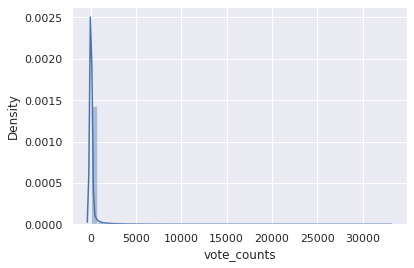

In [ ]:
# plot the distribution of vote_counts
sns.distplot(votes_per_movie['vote_counts'])

We cannot use the standard deviation of the movie dataset to calculate the cut-off or identifying outliers since it is not a normal Gaussian distribution, as seen above. We will resort to the IQR to identify outliers by defining limits on the dataset values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles.

In [52]:
# calculate the Interquartile range (IQR)
q25 = percentile(votes_per_movie['vote_counts'], 25)
q75 = percentile(votes_per_movie['vote_counts'], 75)
iqr = q75 - q25


In [53]:
# print the parameters
print('q25:',q25, '\nq75:',q75, '\niqr:',iqr)

q25: 97.25 
q75: 1705.5 
iqr: 1608.25


Next we will calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off from the 25th percentile and add it to the 75th percentile to give the actual limits on the data.

In [54]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower = q25
upper = q75 + cut_off

# print the parameters
print('cut_off:',cut_off, '\nlower:',lower, '\nupper:', upper)

cut_off: 2412.375 
lower: 97.25 
upper: 4117.875


Next we will use these limits to identify the outlier values.

In [55]:
# identify the outliers to be removed
q = ((votes_per_movie['vote_counts'] < lower) | (votes_per_movie['vote_counts'] > upper))
removal_one = votes_per_movie[~q]

print('There are', removal_one.shape[0], 'movies in the cutoff list, accounting for', removal_one.vote_counts.sum(), 'votes.')

There are 2041 movies in the cutoff list, accounting for 2135403 votes.


Next we will remove the movies with the number of votes listed in the outliers list.

In [56]:
# extract only the movies not part of the outlier votes
tmic_df_encoded = tmic_df_encoded[~tmic_df_encoded['movieId'].reindex(tmic_df_encoded.index,
                                                                     fill_value=False).isin(removal_one['movieId'])]

In [ ]:
# print the new shape of the dataset
print(tmic_df_encoded.shape)
print('\nThis is a reduction of', 10000038 - tmic_df_encoded.shape[0],'records')

(3221346, 26)

This is a reduction of 6778692 records


#### Movies per year of production

In [57]:
# identify the number of movies rated for per year
movies_per_year = (tmic_df_encoded.groupby('year')['userId'].agg([('vote_counts','count')]).reset_index())

In [ ]:
# first five records
movies_per_year.head()

,year,vote_counts
0,1914.0,7
1,1919.0,81
2,1920.0,14
3,1922.0,3
4,1923.0,49


In [ ]:
# more infomation on the production years
movies_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         79 non-null     float64
 1   vote_counts  79 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [58]:
print('There are',movies_per_year.shape[0],'years, accounting for', 
      movies_per_year.vote_counts.sum(), 'votes')

There are 79 years, accounting for 3221346 votes


In [59]:
# calculate the Interquartile range (IQR)
q25 = percentile(movies_per_year.vote_counts, 25)
q75 = percentile(movies_per_year.vote_counts, 75)
iqr = q75 - q25

# print parameter details
print('q5:',q25, '\nq75:',q75, '\niqr:',iqr)

q5: 113.5 
q75: 34133.5 
iqr: 34020.0


Next we will calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off from the 25th percentile and add it to the 75th percentile to give the actual limits on the data.

In [60]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower = q25 - cut_off
upper = q75 + cut_off

# print the cut-off details
print('cut_off:',cut_off, '\nlower:',lower, '\nupper:', upper)

cut_off: 51030.0 
lower: -50916.5 
upper: 85163.5


Next we will use these limits to identify the outlier values.

In [61]:
# identify the outliers to be removed
q = ((movies_per_year['vote_counts'] < lower) | (movies_per_year['vote_counts'] > upper))
removal_two = movies_per_year[~q]

# retain the old shape information
old_shape = tmic_df_encoded.shape

print('There are', removal_two.shape[0], 'movies in the cutoff list, accounting for',
      removal_two.vote_counts.sum(), 'votes.')

There are 69 movies in the cutoff list, accounting for 981211 votes.


Next we will remove the movies with the number of votes listed in the outliers list.

In [62]:
# extract only the movies not part of the outlier years
tmic_df_encoded = tmic_df_encoded[~tmic_df_encoded['year'].reindex(tmic_df_encoded.index,
                                                                     fill_value=False).isin(removal_two['year'])]

In [63]:
# print the new shape of the dataset
print(tmic_df_encoded.shape)
print('\nThis is a reduction of', old_shape[0] - tmic_df_encoded.shape[0],'records')

(2240135, 26)

This is a reduction of 981211 records


#### Movies per year of vote


##### Timestamp data extraction
Next we will extract the voting year, month, dow data from the timestamp data

In [64]:
# extract the year
tmic_df_encoded['vote_year'] = pd.DatetimeIndex(tmic_df_encoded['timestamp']).year
# extract the month
tmic_df_encoded['vote_month'] = pd.DatetimeIndex(tmic_df_encoded['timestamp']).month
# extract the day of week
tmic_df_encoded['vote_dow'] = pd.DatetimeIndex(tmic_df_encoded['timestamp']).dayofweek


In [ ]:
# print the first five rows
tmic_df_encoded.head()

,userId,movieId,rating,timestamp,year,runtime,budget,Film-Noir,War,Western,...,Adventure,Mystery,Romance,Horror,Children,Sci-Fi,Thriller,vote_year,vote_month,vote_dow
0,106343.0,5.0,4.5,2008-03-23 02:18:59,1995.0,106.0,30000000.0,0,0,0,...,0,0,0,0,0,0,0,2008,3,6
4,97844.0,1784.0,3.5,2005-03-24 02:13:58,1997.0,139.0,50000000.0,0,0,0,...,0,0,1,0,0,0,0,2005,3,3
5,33970.0,1265.0,4.0,2016-05-15 02:41:30,1993.0,101.0,14600000.0,0,0,0,...,0,0,1,0,0,0,0,2016,5,6
6,109194.0,2011.0,4.0,2019-01-20 00:34:20,1989.0,NaN,NaN,0,0,0,...,1,0,0,0,0,1,0,2019,1,6
7,57239.0,150.0,4.0,2001-08-07 03:26:18,1995.0,140.0,52000000.0,0,0,0,...,1,0,0,0,0,0,0,2001,8,1


In [65]:
# identify the number of movies rated for per year
movies_per_year_vote = (tmic_df_encoded.groupby('vote_year')['userId'].agg([('vote_counts','count')]).reset_index())

In [ ]:
# first five rows
movies_per_year_vote.head()

,vote_year,vote_counts
0,1995,1
1,1996,375626
2,1997,105318
3,1998,38022
4,1999,125531


In [ ]:
# get more infomation
movies_per_year_vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   vote_year    25 non-null     int64
 1   vote_counts  25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [ ]:
print('There are',movies_per_year_vote.shape[0],'years, accounting for', 
      movies_per_year_vote.vote_counts.sum(), 'votes')

There are 25 years, accounting for 2240135 votes


In [66]:
# calculate the Interquartile range (IQR)
q25 = percentile(movies_per_year_vote.vote_counts, 25)
q75 = percentile(movies_per_year_vote.vote_counts, 75)
iqr = q75 - q25

# print parameter details
print('q5:',q25, '\nq75:',q75, '\niqr:',iqr)

q5: 50795.0 
q75: 100936.0 
iqr: 50141.0


Next we will calculate the cutoff for outliers as 1.5 times the IQR and subtract this cut-off from the 25th percentile and add it to the 75th percentile to give the actual limits on the data.

In [67]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower = q25 - cut_off
upper = q75 + cut_off

# print the cut-off details
print('cut_off:',cut_off, '\nlower:',lower, '\nupper:', upper)

cut_off: 75211.5 
lower: -24416.5 
upper: 176147.5


Next we will use these limits to identify the outlier values.

In [68]:
# identify the outliers to be removed
q = ((movies_per_year_vote['vote_counts'] < lower) | (movies_per_year_vote['vote_counts'] > upper))
removal_three = movies_per_year_vote[~q]

# retain the old shape information
old_shape = tmic_df_encoded.shape

print('There are', removal_three.shape[0], 'movies in the cutoff list, accounting for',
      removal_three.vote_counts.sum(), 'votes.')

There are 23 movies in the cutoff list, accounting for 1683719 votes.


Next we will remove the movies with the number of votes listed in the outliers list.

In [69]:
# extract only the movies not part of the outlier years
tmic_df_encoded = tmic_df_encoded[~tmic_df_encoded['vote_year'].reindex(tmic_df_encoded.index,
                                                                     fill_value=False).isin(removal_three['vote_year'])]

In [ ]:
# print the new shape of the dataset
print(tmic_df_encoded.shape)
print('\nThis is a reduction of', old_shape[0] - tmic_df_encoded.shape[0],'records')

(556416, 29)

This is a reduction of 1683719 records


Next we will perform the following cleanup tasks:
* drop the redundant `timestamp` feature 
* convert the `year` from type object to type int
* convert the `rating`, `budget` and `runtime` features into floats

In [70]:
# drop the timestamp feature
tmic_df_encoded.drop('timestamp', axis=1, inplace=True)

# convert the production year to type int
tmic_df_encoded['year'] = tmic_df_encoded['year'].astype(int)
# change the column name to production_year
tmic_df_encoded.rename(columns={'year':'production_year'}, inplace=True)

# convert the rating, budget and runtime features to type float
tmic_df_encoded['budget'] = tmic_df_encoded['budget'].astype(float)
tmic_df_encoded['runtime'] = tmic_df_encoded['runtime'].astype(float)
tmic_df_encoded['rating'] = tmic_df_encoded['rating'].astype(float)

### Checkpoint

#### Export

In [ ]:
# ML checkpoint
# export tmic_df_encoded for later use
tmic_df_encoded.to_csv('tmic_df_outlierR.csv', index=False, encoding='utf-8-sig')
!cp tmic_df_outlierR.csv "drive/My Drive/Recommender"

#### Import

In [ ]:
# ML checkpoint
# Upload tmic_df_encoded.csv
url = 'https://drive.google.com/file/d/1--qGttVM8ai1CSXYM0aQbCuwWm_kjbsJ/view?usp=sharing'
output = "tmic_df_outlierR.csv"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

# create the dataframe
tmic_df_encoded = pd.read_csv('tmic_df_outlierR.csv')

Downloading...
From: https://drive.google.com/uc?id=1--qGttVM8ai1CSXYM0aQbCuwWm_kjbsJ
To: /content/tmic_df_outlierR.csv
100%|██████████| 71.3M/71.3M [00:00<00:00, 151MB/s]


In [ ]:
# get more information
get_info(tmic_df_encoded)

tmic_df_encoded has 815473 rows and 25 columns, namely:
 ['userId', 'movieId', 'rating', 'production_year', 'runtime', 'budget', 'War', 'Animation', 'Sci-Fi', 'Mystery', 'Fantasy', 'Film-Noir', 'Horror', 'Action', 'IMAX', 'Musical', 'Crime', 'Thriller', 'Documentary', 'Adventure', 'Comedy', 'Romance', 'Children', 'Drama', 'Western']

The following table represents the column data types in tmic_df_encoded:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815473 entries, 0 to 815472
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   userId           815473 non-null  float64
 1   movieId          815473 non-null  float64
 2   rating           815473 non-null  float64
 3   production_year  815473 non-null  int64  
 4   runtime          815473 non-null  float64
 5   budget           815473 non-null  float64
 6   War              815473 non-null  int64  
 7   Animation        815473 non-null  int64  
 8   Sci-

Next we will drop, `vote_year`, `vote_month` and `vote_dow` as these are not present in the test data.

In [72]:
# drop redundant features
tmic_df_encoded.drop(['vote_year','vote_month','vote_dow'], axis=1, inplace=True)

Next we will deleted the rows of data where the values are null as these only represent 0.05% of the data.

### Implementing PCA

Observing the first few rows of the data and then seeing the shape, above, we note that there are 16 columns. Not all of these columns are numeric and some of them, like `userId`, `movieId` and `rating`, could be considered labels. Labels are not used in an unsupervised learning environment. We will remove them from the features but retain them for later use. 

In [71]:
# get more information on the dataframe
get_info(tmic_df_encoded)

tmic_df_encoded has 556416 rows and 28 columns, namely:
 ['userId', 'movieId', 'rating', 'production_year', 'runtime', 'budget', 'Western', 'Sci-Fi', 'Horror', 'Animation', 'Documentary', 'Drama', 'Romance', 'Fantasy', 'Comedy', 'War', 'IMAX', 'Musical', 'Thriller', 'Children', 'Film-Noir', 'Mystery', 'Crime', 'Adventure', 'Action', 'vote_year', 'vote_month', 'vote_dow']

The following table represents the column data types in tmic_df_encoded:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556416 entries, 14 to 5356727
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   userId           556416 non-null  object 
 1   movieId          556416 non-null  object 
 2   rating           556416 non-null  float64
 3   production_year  556416 non-null  int64  
 4   runtime          514265 non-null  float64
 5   budget           495855 non-null  float64
 6   Western          556416 non-null  int64  
 7   Sci-Fi    

There are 42151 runtime elements and 60561 budget elements with null values. These respectively account for 8% and 11% of the data. We will remove them from the dataset.

In [73]:
# remove rows with null values
tmic_df_encoded = tmic_df_encoded.dropna()

In [74]:
# create a short list of unwanted columns
labels = ['rating','userId','movieId']

# retain the wanted columns as features
features = [col for col in tmic_df_encoded.columns if col not in labels]

Next we will perform scaling. Scaling data is vitally important because not all variables are measured on the same scales and/or using the same units.

In [75]:
# create a scaler object
scaler = StandardScaler()

# create deep copy of the tmic_df which will be scaled
tmic_df_scaled = pd.DataFrame(columns = tmic_df_encoded.columns, data = copy.deepcopy(tmic_df_encoded.values))

# apply the scaling object
tmic_df_scaled[features] = preprocessing.scale(tmic_df_scaled[features])

We'll generate a PCA object and fit the features in the scaled data frame to it. We'll then plot a line graph showing the cumulative variance explained versus increasing number of components. 

In [76]:
# define PCA object
pca = PCA()

# fit pca to the data
princ_comp = pca.fit_transform(tmic_df_scaled[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = princ_comp)
pca_df['movieId'] = tmic_df_encoded['movieId']

Text(0, 0.5, 'Cumulative explained variance')

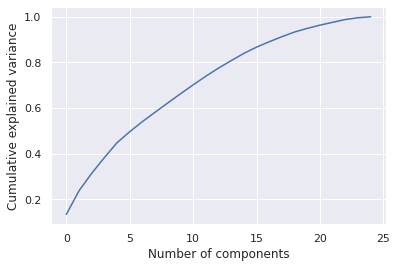

In [ ]:
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [77]:
# confirm how many components explain roughly 90% of the variance
pca_90 = PCA(.90)
pca_90.fit_transform(tmic_df_scaled[features])
print(round(pca_90.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_90.n_components_,
      "components.")

92.3 % of variance explained by 16 components.


### Model construction
Using (PCA) we will construct a number of models.

As seen above, 16 components of an original 23 can be used to explain about 92.3% of the variance in the dataset. 

Next we will use the reduced dataset, consisting of just 16 components, by using it to build a predictive regressor model.

We will use the feature named `rating` as the response variable.

In [78]:
# exclude non-features from the data
reg_data = tmic_df_scaled[features]

# set aside response variable (Unscaled!)
reg_response = tmic_df_encoded['rating']


In [79]:
# split the dataset up into train and test using a ratio of 80/20 (train/test, respectively)
X_train, X_test, y_train, y_test = train_test_split(reg_data, reg_response, test_size=0.2)

In [80]:
# print the shape of the dataframe
X_train.shape, X_test.shape

((396645, 22), (99162, 22))

In [81]:
# create PCA object with n_components set to 17
pca_reg = PCA(n_components=17)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

# confirm the number of components
pca_reg.n_components_

17

In [82]:
pca_reg.explained_variance_ratio_.sum()

0.9413742824039685

From the above, we note that the selected component range of 17 provides a explained data variance of 94%

#### Helper function
The following helper function logs the Comet-ml experiments extracts the Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) scores.  The RMSE is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed. The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction.

In [86]:
# dictionary to log model performance
performance_dict = {}

def show_performance_data(y_test, X_train, predictions, model_name):
  """This function evaluates each model performance and sends the 
  experiment to Comet while also saving the metric to a 
  dictionary for later use."""

  # Comet ML api key for experiment logging
  experiment = Experiment(api_key = "uSjPrOwXQdE1GLSEQuhuEJ1QQ",
                          project_name="unsupervised-recommender-system",
                          workspace="stanfordgibson"
  )

  rmse = np.sqrt(mean_squared_error(predictions, y_test))
  mae = mean_absolute_error(predictions, y_test)

  print('RMSE:', rmse)
  print('MAE:', mae)

  print(model_name, "predicts rating to within", 
    round((round(np.mean(errors_reg), 2)/reg_response.agg("median"))*100, 1), 
    "% of its value.")

  # Comet metrics
  metrics = {"RMSE": rmse, "MAE": mae}

  # Populate the Performance dictionary
  performance_dict[model_name] = {"RMSE": rmse, "MAE": mae}

  experiment.log_dataset_hash(X_train)
  experiment.log_parameters(params)
  experiment.log_metrics(metrics)
  experiment.end()

Next we will use the trained model to make predictions from the test set.

In [84]:
# apply the PCA reduction to X_test
X_test = pca_reg.transform(X_test)

# instantiate model object
rf = RandomForestRegressor(random_state=1)

# define parameters for GridSearch
parameters = {
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100]
}

# cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

# gridsearch to find the best parameters
rf_reg = GridSearchCV(rf, param_grid=parameters, 
                     cv = cv, n_jobs=-1, verbose=1)

# fit the rf object
rf_reg.fit(X_train, y_train)

# make the prediction
y_pred = rf_reg.predict(X_test)

print('The best parameters for the Random Forest Regressor are:', end='\n\n')
print(rf_reg.best_params_)

# logging for the project on Comet.ml
params = rf_reg.best_params_


Fitting 10 folds for each of 1 candidates, totalling 10 fits
The best parameters for the Random Forest Regressor are:

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [87]:
# use the forest's predict method on the test data
predictions = rf_reg.predict(X_test)

# calculate the absolute errors
errors_reg = abs(predictions - y_test)

# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_reg), 2))

show_performance_data(y_test, X_train, predictions, 'Random Forest')

Mean Absolute Error: 0.75


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/stanfordgibson/unsupervised-recommender-system/e62556744c0546eda9c0a7fffc6ac81d
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1AVBrQMx9uxwCgCl94nLnbUWjUnCCAOlK
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall b

RMSE: 0.9417087987080609
MAE: 0.7505618370683041
Random Forest predicts rating to within 18.8 % of its value.


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/stanfordgibson/unsupervised-recommender-system/92b2fd2d1cc147f188ef1f1e468984df
COMET INFO:   Metrics:
COMET INFO:     MAE  : 0.7505618370683041
COMET INFO:     RMSE : 0.9417087987080609
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1AVBrQMx9uxwCgCl94nLnbUWjUnCCAOlK
COMET INFO:   Parameters:
COMET INFO:     max_depth         : 1
COMET INFO:     max_features      : auto
COMET INFO:     min_samples_leaf  : 1
COMET INFO:     min_samples_split : 2
COMET INFO:     n_estimators      : 100
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages  

Next we will construct a dataframe of the PCA components and their rank. First we will obtain the PCA components selected and compare those to the initial list of components.

In [88]:
# number of components
n_pcs = pca_reg.components_.shape[0]

# get the index of the most important feature on each component i.e. largest absolute value
most_important = [np.abs(pca_reg.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)

[6, 20, 8, 18, 5, 10, 7, 17, 3, 3, 3, 17, 4, 12, 12, 19, 15]


In [89]:
# retrieve the intial features
initial_feature_names = list(tmic_df_encoded.columns)
remove = [ 'rating'] #, 'production_year'
for r in remove:
  initial_feature_names.remove(r)

# print the features
print('The number of features:',len(initial_feature_names))
print(initial_feature_names)

The number of features: 24
['userId', 'movieId', 'production_year', 'runtime', 'budget', 'Western', 'Sci-Fi', 'Horror', 'Animation', 'Documentary', 'Drama', 'Romance', 'Fantasy', 'Comedy', 'War', 'IMAX', 'Musical', 'Thriller', 'Children', 'Film-Noir', 'Mystery', 'Crime', 'Adventure', 'Action']


In [90]:
# get the names of the most important features
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)
print(len(most_important_names))

['Sci-Fi', 'Mystery', 'Animation', 'Children', 'Western', 'Drama', 'Horror', 'Thriller', 'runtime', 'runtime', 'runtime', 'Thriller', 'budget', 'Fantasy', 'Fantasy', 'Film-Noir', 'IMAX']
17


In [91]:
# construct a dictionary of features and their importance
pca_feature_dict = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pca_features_df = pd.DataFrame(sorted(pca_feature_dict.items()))
print(pca_features_df)

       0          1
0    PC1     Sci-Fi
1   PC10    runtime
2   PC11    runtime
3   PC12   Thriller
4   PC13     budget
5   PC14    Fantasy
6   PC15    Fantasy
7   PC16  Film-Noir
8   PC17       IMAX
9    PC2    Mystery
10   PC3  Animation
11   PC4   Children
12   PC5    Western
13   PC6      Drama
14   PC7     Horror
15   PC8   Thriller
16   PC9    runtime


### Making predictions

#### Engineering the test dataset
Now we will make predictions on the test dataset using the model constructed.

Adding features to the test dataset, required to use the model. First we will merge the test and train dataset to retrieve movie metadata.

In [95]:
test_dfC.head(2)

,userId,movieId
0,1,2011
1,1,4144


In [96]:
movies_dfC.head(2)

,movieId,title,genres,year
0,1,Toy Story (1995),"Adventure, Animation, Children, Comedy, Fantasy",1995.0
1,2,Jumanji (1995),"Adventure, Children, Fantasy",1995.0


In [97]:
# combine train_df and movies_df
test_movies_combined_df = pd.merge(left=test_dfC, right=movies_dfC, 
                                    how='left', on='movieId')

In [100]:
# extract the different genres used
genre_set = set()
for i in list(test_movies_combined_df['genres'].unique()):
  for j in i.split(','):
    genre_set.add(j.strip())

# create the genre encoding
for i in genre_set:
  test_movies_combined_df[i] = np.where(test_movies_combined_df["genres"].str.contains(i), 1, 0)

# drop the redundant features
test_movies_combined_df.drop(['title','genres'], axis=1, inplace=True)


Next we will combine the train, movie and imdb datasets to get the movie metadata.

In [102]:
# combine train_df and movies_df
test_movies_imdb_combined_df = pd.merge(left=test_movies_combined_df, right=imdb_dfC, 
                                    how='left', on='movieId')

In [ ]:
# get more information
get_info(test_movies_imdb_combined_df)


Next we will perform feature engineering and remove redundant features as well as perform cell conversions.

In [ ]:
# drop redundant features
test_movies_imdb_combined_df.drop(['title_cast','director','plot_keywords'], axis=1, inplace=True)

# convert nan to 0.0
# fill the missing runtime values with the median value
test_movies_imdb_combined_df['runtime'] = test_movies_imdb_combined_df['runtime'].fillna(test_movies_imdb_combined_df['runtime'].median())

# fill the missing budget values with the median value
test_movies_imdb_combined_df['budget'] = test_movies_imdb_combined_df['budget'].fillna(test_movies_imdb_combined_df['budget'].median())

# remane the year feature
test_movies_imdb_combined_df.rename(columns={'year':'production_year'}, inplace=True)


In [ ]:
# fill the missing budget values with the median value
test_movies_imdb_combined_df['production_year'] = test_movies_imdb_combined_df['production_year'].fillna(test_movies_imdb_combined_df
                                                                                                         ['production_year'].median())

#### Model application

Next we exclude the columns not identified by PCA as important.

In [ ]:
# print PCA components lenght
tmi_combined_df = test_movies_imdb_combined_df[(most_important_names)]
print(len(list(tmi_combined_df.columns)))


17


Next we will use the model to make predictions, after standardising the data.

In [ ]:
# standardise the data
tmi_combined_df = scaler.fit_transform(tmi_combined_df)
# pca_reg.transform(test_movies_imdb_combined_df)

In [ ]:
# using the Random Forest model to make predictions
y_hat = rf_reg.predict(tmi_combined_df)


#### Prediction dataframe

In [ ]:
# empty dataframe
predictions = pd.DataFrame()

# create the index
predictions.index = test_movies_imdb_combined_df.index


In [ ]:
# fill the dataframe
predictions['userId'] = test_movies_imdb_combined_df['userId'].astype(object)
predictions['movieId'] = test_movies_imdb_combined_df['movieId'].astype(object)
predictions['rating'] = y_hat

# print the first 5 predictions
predictions.head()

,userId,movieId,# rating
0,1,2011,3.109059
1,1,4144,3.708431
2,1,5767,3.070073
3,1,6711,3.711057
4,1,7318,3.177734


In [ ]:
# get the predictions into the correct format
cols = ['userId','movieId']
predictions['rating'] = predictions[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
predictions.rename(columns={'combined':'Id'}, inplace=True)
predictions = predictions[['Id','rating']]
predictions.head()

,Id,rating
0,1_2011,3.109059
1,1_4144,3.708431
2,1_5767,3.070073
3,1_6711,3.711057
4,1_7318,3.177734


In [ ]:
# export the prediction dataframe to csv
predictions.to_csv('rf_team9_29042022.csv', index=False, encoding='utf-8-sig')
!cp rf_team9_29042022.csv "drive/My Drive/Colab Notebooks/Movie Recommender"